In [1]:
import os 
import sys 
import numpy as np

sys.path.append("/Users/bobaebak/ai_text_detection")

In [2]:
from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

In [3]:
from models.gptzero_model import GPTZeroRunner

# Check on Human Text

In [4]:
file_name = "../data/student_answers.json"
H_texts = load_json_list(file_name)

In [13]:
for item in H_texts:
    try:
        model = GPTZeroRunner('mps', 'gpt2-medium')
        sentence = item['input']
        
        ppl_dict = model(sentence)
        item['gptzero'] = ppl_dict
        print("============")

    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")

sentence length: 4
Perplexity 33
Perplexity per line 54.75
Burstiness 79
sentence length: 1
Perplexity 30
Perplexity per line 30.0
Burstiness 30
sentence length: 3
Perplexity 33
Perplexity per line 64.0
Burstiness 127
sentence length: 2
Perplexity 26
Perplexity per line 53.0
Burstiness 80
sentence length: 5
Perplexity 55
Perplexity per line 114.0
Burstiness 173
sentence length: 4
Perplexity 65
Perplexity per line 147.25
Burstiness 359
sentence length: 9
Perplexity 28
Perplexity per line 85.88888888888889
Burstiness 303
sentence length: 5
Perplexity 56
Perplexity per line 154.6
Burstiness 274
sentence length: 11
Perplexity 34
Perplexity per line 74.9090909090909
Burstiness 258
sentence length: 5
Perplexity 54
Perplexity per line 232.0
Burstiness 520
sentence length: 1
Perplexity 372
Perplexity per line 372.0
Burstiness 372
sentence length: 5
Perplexity 40
Perplexity per line 67.0
Burstiness 153
sentence length: 3
Perplexity 40
Perplexity per line 71.33333333333333
Burstiness 92
sentence

In [ ]:
file_name = "../data/gptzero_human.json"
save_json_list(file_name, H_texts)

# Check on AI Text

In [15]:
file_name = "../data/raidar_ai_answers.json"
M_texts = load_json_list(file_name)

In [17]:
for item in M_texts:
    try:
        model = GPTZeroRunner('mps', 'gpt2-medium')
        sentence = item['input']
        
        ppl_dict = model(sentence)
        item['gptzero'] = ppl_dict
        print("============")

    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")

sentence length: 2
Perplexity 38
Perplexity per line 48.0
Burstiness 58
sentence length: 2
Perplexity 25
Perplexity per line 44.5
Burstiness 76
sentence length: 3
Perplexity 36
Perplexity per line 55.333333333333336
Burstiness 72
sentence length: 2
Perplexity 60
Perplexity per line 75.0
Burstiness 96
sentence length: 2
Perplexity 143
Perplexity per line 178.0
Burstiness 263
sentence length: 3
Perplexity 52
Perplexity per line 68.0
Burstiness 75
sentence length: 2
Perplexity 72
Perplexity per line 94.5
Burstiness 138
sentence length: 2
Perplexity 92
Perplexity per line 117.5
Burstiness 184
sentence length: 2
Perplexity 33
Perplexity per line 44.5
Burstiness 61
sentence length: 2
Perplexity 91
Perplexity per line 171.5
Burstiness 296
sentence length: 1
Perplexity 228
Perplexity per line 228.0
Burstiness 228
sentence length: 2
Perplexity 64
Perplexity per line 91.5
Burstiness 116
sentence length: 3
Perplexity 39
Perplexity per line 91.33333333333333
Burstiness 187
sentence length: 1
Perpl

In [20]:
file_name = "../data/gptzero_ai_raidar.json"
save_json_list(file_name, M_texts)

JSON array saved to ../data/gptzero_ai_raidar.json


# Plot GPTZero

In [4]:
H_texts = load_json_list('../data/gptzero_human.json')
M_texts = load_json_list('../data/gptzero_ai_raidar.json')

### Histogram of GPTZero

In [5]:
# perplexity_per_line_score plot data (threshold)
h_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in H_texts if item.get("gptzero", None) is not None]
m_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in M_texts if item.get("gptzero", None) is not None]

# perplexity 
h_ppl = [item['gptzero']['perplexity'] for item in H_texts if item.get("gptzero", None) is not None]
m_ppl = [item['gptzero']['perplexity'] for item in M_texts if item.get("gptzero", None) is not None]

# burstiness
h_burstiness = [item['gptzero']['burstiness'] for item in H_texts if item.get("gptzero", None) is not None]
m_burstiness = [item['gptzero']['burstiness'] for item in M_texts if item.get("gptzero", None) is not None]

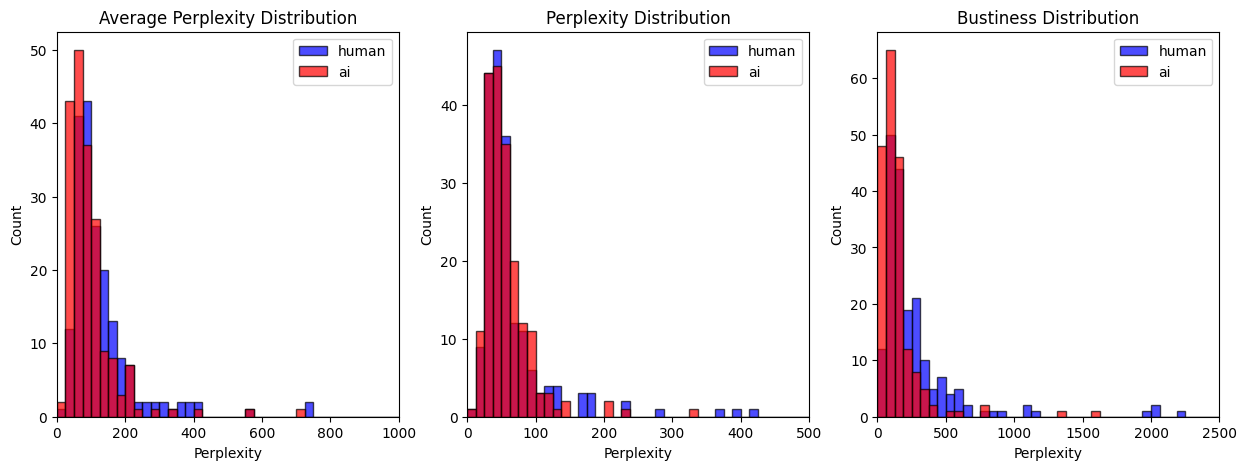

In [8]:
#### Histogram 

helper = PlotHelper(
    row=1, col=3, figsize=(15,5), title="GPTZero Plots",
    plots=[
        PlotItem(ptype="hist", title="Average Perplexity Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 1000),
                 x=[h_line_ppl, m_line_ppl,],
                 args=[{"bins":np.linspace(0, 1000, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 1000, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="hist", title="Perplexity Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 500),
                 x=[h_ppl, m_ppl,],
                 args=[{"bins":np.linspace(0, 500, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 500, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="hist", title="Bustiness Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 2500),
                 x=[h_burstiness, m_burstiness,],
                 args=[{"bins":np.linspace(0, 2500, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 2500, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)

### Bar of GPTZero

In [5]:
# perplexity_per_line_score plot data (threshold)
h_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in H_texts if item.get("gptzero", None) is not None]
m_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in M_texts if item.get("gptzero", None) is not None]

# perplexity 
h_ppl = [item['gptzero']['perplexity'] for item in H_texts if item.get("gptzero", None) is not None]
m_ppl = [item['gptzero']['perplexity'] for item in M_texts if item.get("gptzero", None) is not None]

# burstiness
h_burstiness = [item['gptzero']['burstiness'] for item in H_texts if item.get("gptzero", None) is not None]
m_burstiness = [item['gptzero']['burstiness'] for item in M_texts if item.get("gptzero", None) is not None]

h_y = [_ for _ in range(len(h_line_ppl))]
m_y = [_ for _ in range(len(m_line_ppl))]

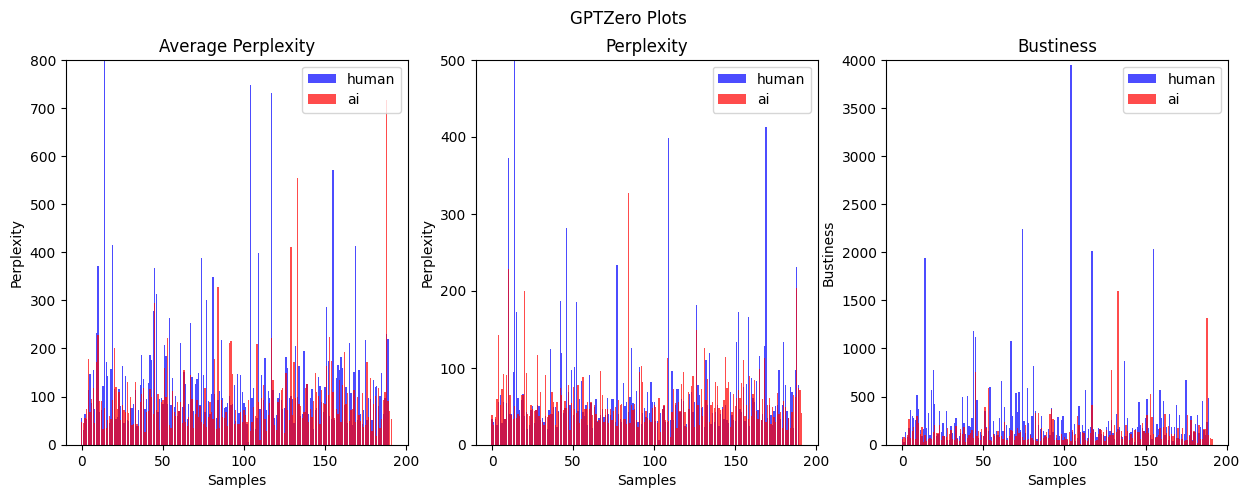

In [9]:
helper = PlotHelper(
    row=1, col=3, figsize=(15,5), title="GPTZero Plots",
    plots=[
        PlotItem(ptype="bar", title="Average Perplexity", xlabel="Samples", ylabel="Perplexity", ylim=(0, 800),
                 y=[h_line_ppl, m_line_ppl,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="Perplexity", xlabel="Samples", ylabel="Perplexity", ylim=(0, 500),
                 y=[h_ppl, m_ppl,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="Bustiness", xlabel="Samples", ylabel="Bustiness", ylim=(0, 4000),
                 y=[h_burstiness, m_burstiness,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)